In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

In [15]:
train_dir = r"C:\Users\tushar\Desktop\DL + AI Exam Paper\DL + AI Exam Paper\Dataset\CNN\Shoe Classification\train"
test_dir = r"C:\Users\tushar\Desktop\DL + AI Exam Paper\DL + AI Exam Paper\Dataset\CNN\Shoe Classification\test"

In [40]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode=None,  # Test labels are unknown
    shuffle=False
)


Found 623 images belonging to 3 classes.
Found 155 images belonging to 3 classes.
Found 0 images belonging to 0 classes.


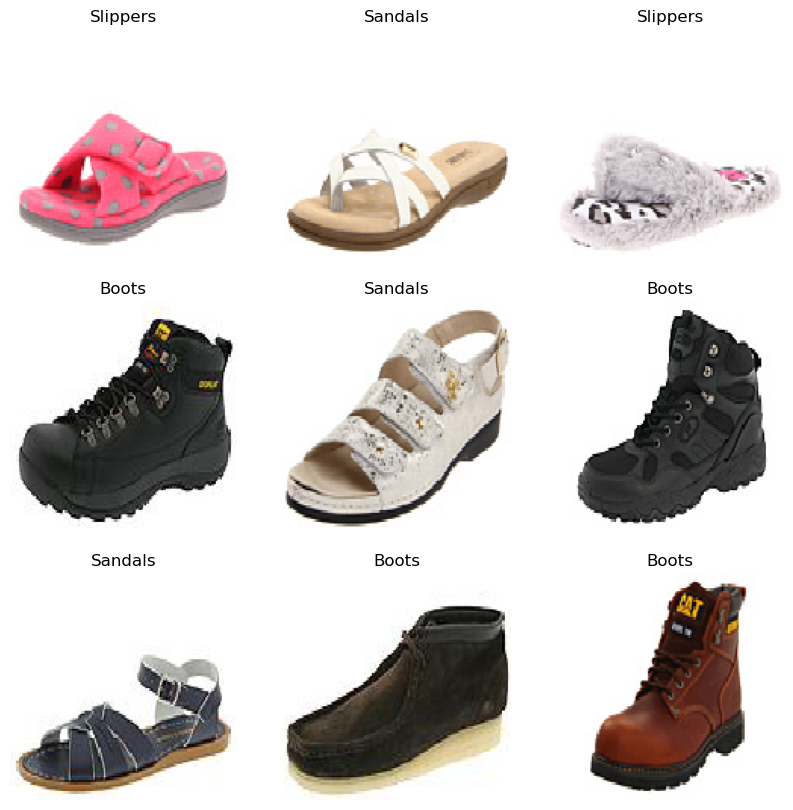

In [17]:
class_names = list(train_generator.class_indices.keys())
images, labels = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis('off')
plt.show()


In [18]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 519ms/step - accuracy: 0.4933 - loss: 1.0623 - val_accuracy: 0.8968 - val_loss: 0.3212
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 481ms/step - accuracy: 0.8528 - loss: 0.3414 - val_accuracy: 0.8710 - val_loss: 0.3893
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 484ms/step - accuracy: 0.8659 - loss: 0.3196 - val_accuracy: 0.9290 - val_loss: 0.2190
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 469ms/step - accuracy: 0.9173 - loss: 0.2138 - val_accuracy: 0.9161 - val_loss: 0.3140
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 472ms/step - accuracy: 0.9375 - loss: 0.1955 - val_accuracy: 0.9419 - val_loss: 0.2521
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 474ms/step - accuracy: 0.9791 - loss: 0.0985 - val_accuracy: 0.9355 - val_loss: 0.2709
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 471ms/step - accuracy: 0.9685 - loss: 0.1023 - val_accuracy: 0.9290 - val_loss: 0.3052
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 474ms/step - accuracy: 0.9641 - loss: 0.0916 - val_accur

In [33]:
print(f"Number of samples in test set: {test_generator.samples}")


Number of samples in test set: 0


In [34]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
test_dir = r"C:\Users\tushar\Desktop\DL + AI Exam Paper\DL + AI Exam Paper\Dataset\CNN\Shoe Classification\test"
image_paths = [os.path.join(test_dir, fname) for fname in os.listdir(test_dir) if fname.endswith(('.jpg', '.png'))]

test_images = []
for img_path in image_paths:
    img = load_img(img_path, target_size=(150, 150))  # Resize to match model input size
    img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
    test_images.append(img_array)

test_images = np.array(test_images)  # Convert list to numpy array
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}
for img_path, pred_class in zip(image_paths, predicted_classes):
    print(f"Image: {os.path.basename(img_path)}, Predicted Category: {class_labels[pred_class]}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Image: image (1).jpg, Predicted Category: Sandals
Image: image (10).jpg, Predicted Category: Boots
Image: image (11).jpg, Predicted Category: Boots
Image: image (12).jpg, Predicted Category: Slippers
Image: image (13).jpg, Predicted Category: Boots
Image: image (14).jpg, Predicted Category: Slippers
Image: image (15).jpg, Predicted Category: Boots
Image: image (16).jpg, Predicted Category: Sandals
Image: image (17).jpg, Predicted Category: Sandals
Image: image (18).jpg, Predicted Category: Boots
Image: image (19).jpg, Predicted Category: Boots
Image: image (2).jpg, Predicted Category: Boots
Image: image (20).jpg, Predicted Category: Boots
Image: image (21).jpg, Predicted Category: Boots
Image: image (22).jpg, Predicted Category: Boots
Image: image (23).jpg, Predicted Category: Boots
Image: image (24).jpg, Predicted Category: Sandals
Image: image (25).jpg, Predicted Category: Sandals
Image: image (26).jpg, Predicted Category: Sandals
Image: image (2

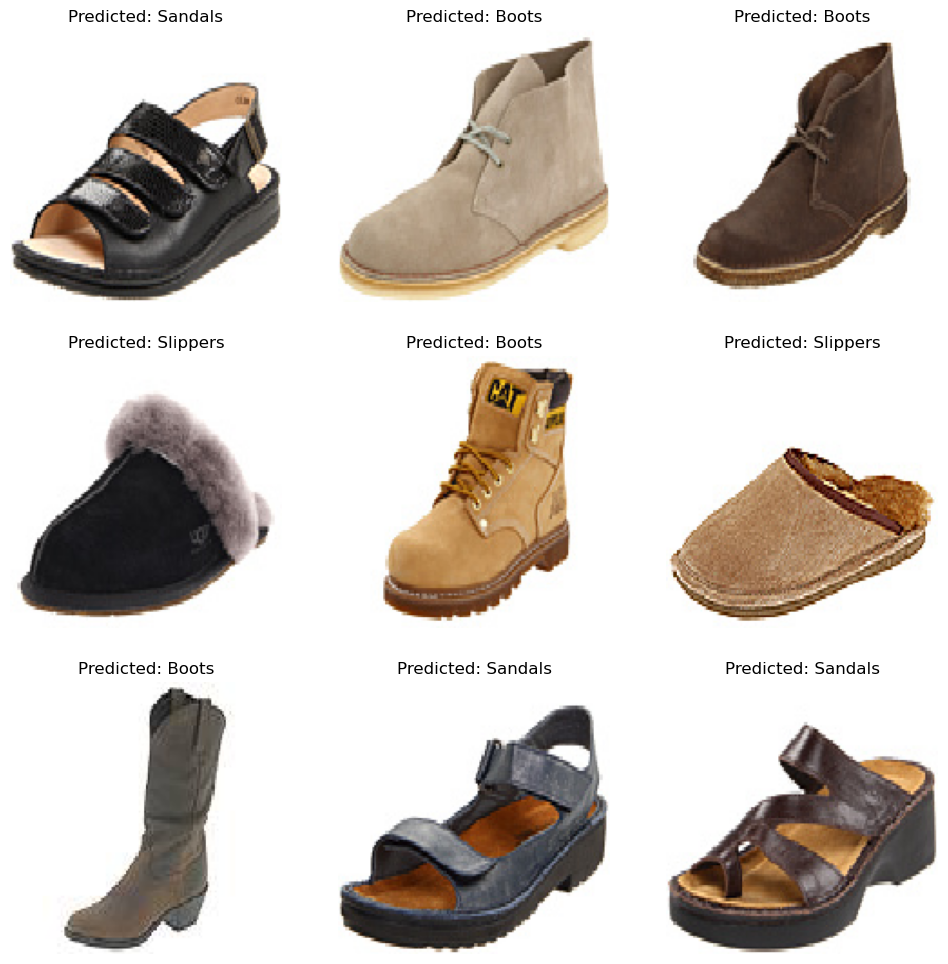

In [39]:
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"Predicted: {class_labels[predicted_classes[i]]}")
    plt.axis('off')
plt.show()

### hence the predictions are made sucessfully